In [1]:
%load_ext autoreload
%autoreload 2
%reset -f


import psyplot.project as psy
import psyplot
from psy_maps.plotters import FieldPlotter
import netCDF4
import glob
import xarray as xr
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from stats import *
import sys
from scipy.signal import savgol_filter
import random

%matplotlib inline
%config InlineBackend.close_figures = False


print("import ok")

import ok


In [31]:
def plot_stats(L,label):

    x = np.arange(60)
    
    fig, axs = plt.subplots(2, 2, figsize=(11, 7))
    
    a = True
    
    for D, l in zip(L, label):
        
    
        axs[0,0].plot(x, np.zeros(60), label=l)
        axs[0,0].set_title("legend")
        axs[0,0].legend()
        
        axs[0,1].plot(x, D['mean_pred'])
        axs[0,1].set_title("mean_pred")
        if a : 
            axs[0,1].plot(x, D['mean_true'], label = 'mean_true')
            axs[0,1].legend()
            a = False    
        
        axs[1,0].plot(x, D['mae'])
        axs[1,0].set_title("mae")
        
        
        
        axs[1,1].plot(x, D['r2'])
        axs[1,1].set_title("r2")
        
        #axs[1,1].set_ylim(0,1.05)

In [32]:
reso = "low"

test_data_path = '/gpfsscratch/rech/psl/upu87pm/my_preprocessed_data/v2/'

grid_b = '../data/nc_data/grid_with_boundaries_'+reso + 'res.nc'
#f_target_save = glob.glob(test_data_path + 'test/72/*target*.npy')
f_target_save = glob.glob(test_data_path + 'test/72/shuffle_reduced_target*.npy')
f_target_save = sorted(f_target_save)
print("found ", len(f_target_save), " target set data")

unscale = '../ClimSim/preprocessing/normalizations/outputs/output_scale.nc'
var = 'ptend_v'
prediction_path = '/gpfsscratch/rech/psl/upu87pm/predictions/MLP/MLPv2/'

found  72  target set data


In [33]:
L = []
label = []
time_steps = 72

In [34]:
pred11 = glob.glob(prediction_path + '*ClimSim_v2_*.npy')
pred11 = sorted(pred11)
print("found ", len(pred11), " prediction")

D = compute_stats(f_target_save[:time_steps], pred11[:time_steps], var = var)#, conv = (dp, area)
L.append(D)
label.append('training with ClimSim MLPv2')

found  72  prediction
stats computed on 4032 time steps


/gpfsdswork/projects/rech/psl/upu87pm/hybrid_climate_modelling/evaluation/stats.py:304: RuntimeWarning: divide by zero encountered in true_divide
  D['r2_ncol'] = 1 - m2_ncol/v_ncol


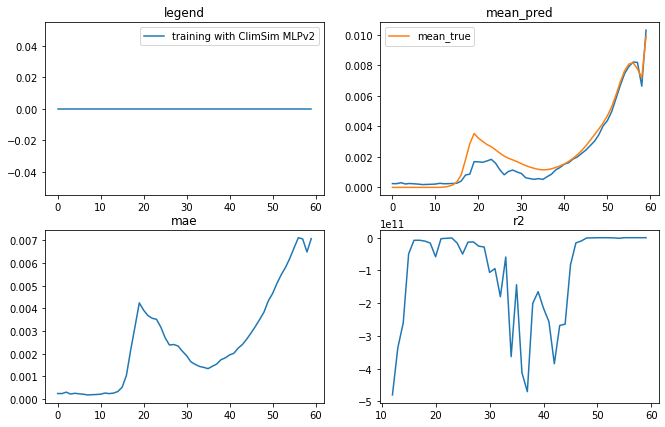

In [35]:
plot_stats(L, label)